## Cats and Dogs: OpenCV and CNN

* Cats and Dogs dataset has images of different sizes. All images are not of same size, so it requires resizing so that it would be easy to train similar sized images in CNN. 

* OpenCV is used in this notebook for cropping, changing RGB colors of the image and grayscale image to see the performance of image.

* Implemented two models:
1. Output layer with softmax activation function and 2 output units
2. Output layer with sigmoid activation function and 1 output unit

* Softmax function is used for multi class classification, while sigmoid function is used for binary classification. Here the problem have binary classification, so we can check that which model is performing best.


In [1]:
from __future__ import absolute_import, division, print_function
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import logging
import tensorflow as tf
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)

68606236/68606236 [==============================] - 0s 0us/step


In [5]:
zip_dir_base = os.path.dirname(zip_dir)
!find $zip_dir_base -type d -print

/root/.keras/datasets
/root/.keras/datasets/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filtered/validation
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs
/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/train/cats
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs


## Separating train and validation dataset

In [6]:
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')  
train_dogs_dir = os.path.join(train_dir, 'dogs')  
validation_cats_dir = os.path.join(validation_dir, 'cats')  
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  

In [7]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [8]:
print('Total training cat images:', num_cats_tr)
print('Total training dog images:', num_dogs_tr,'\n')

print('Total validation cat images:', num_cats_val)
print('Total validation dog images:', num_dogs_val,'\n')

print("Total training images:", total_train)
print("Total validation images:", total_val)

Total training cat images: 1000
Total training dog images: 1000 

Total validation cat images: 500
Total validation dog images: 500 

Total training images: 2000
Total validation images: 1000


## Resizing

In [9]:
batch_size = 100  
img_shape  = 150  

In [10]:
train_image_generator      = ImageDataGenerator(rescale=1./255)  
validation_image_generator = ImageDataGenerator(rescale=1./255)  

In [11]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(img_shape,img_shape), 
                                                           class_mode='binary')

Found 2000 images belonging to 2 classes.


In [12]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              shuffle=False,
                                                              target_size=(img_shape,img_shape), 
                                                              class_mode='binary')

Found 1000 images belonging to 2 classes.


In [13]:
tr_img, _ = next(train_data_gen)

## Helper function for plotting images

In [14]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

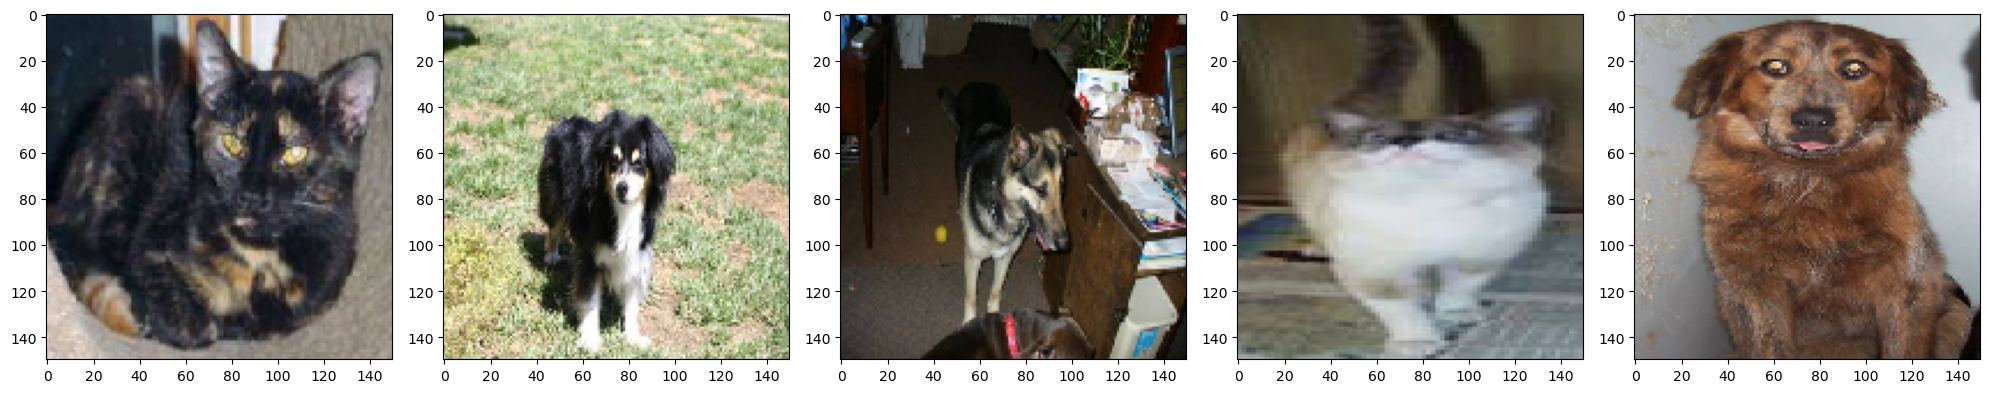

In [15]:
plotImages(tr_img[:5])  

## OpenCV

In [16]:
import cv2

In [17]:
image = tr_img[5]

In [18]:
type(image)

numpy.ndarray

In [19]:
image.shape

(150, 150, 3)

In [20]:
h, w, c = image.shape
print('height: ', h)
print('width:  ', w)
print('channel:', c)

height:  150
width:   150
channel: 3


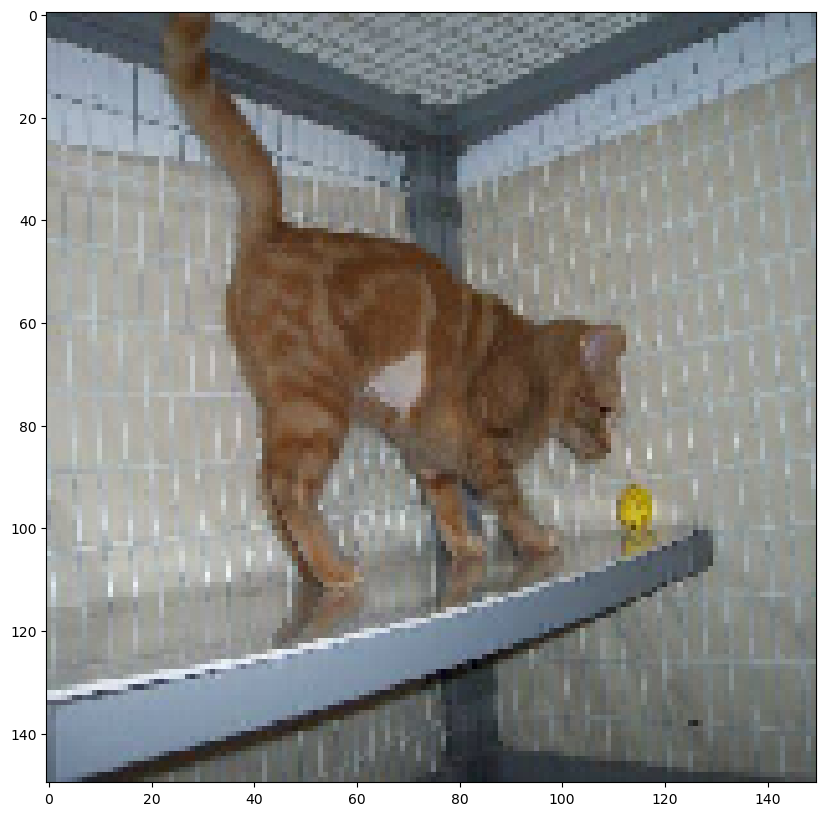

In [21]:
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.show()

In [22]:
new_image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

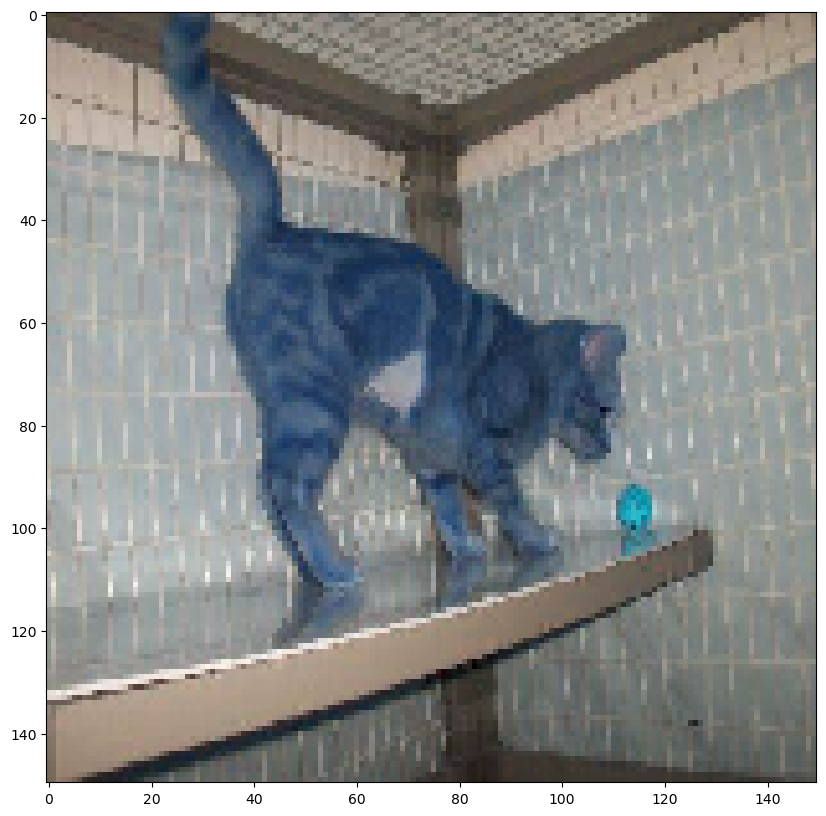

In [23]:
plt.figure(figsize=(10,10))
plt.imshow(new_image)
plt.show()

## Grayscale image

In [24]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [25]:
image_gray.shape

(150, 150)

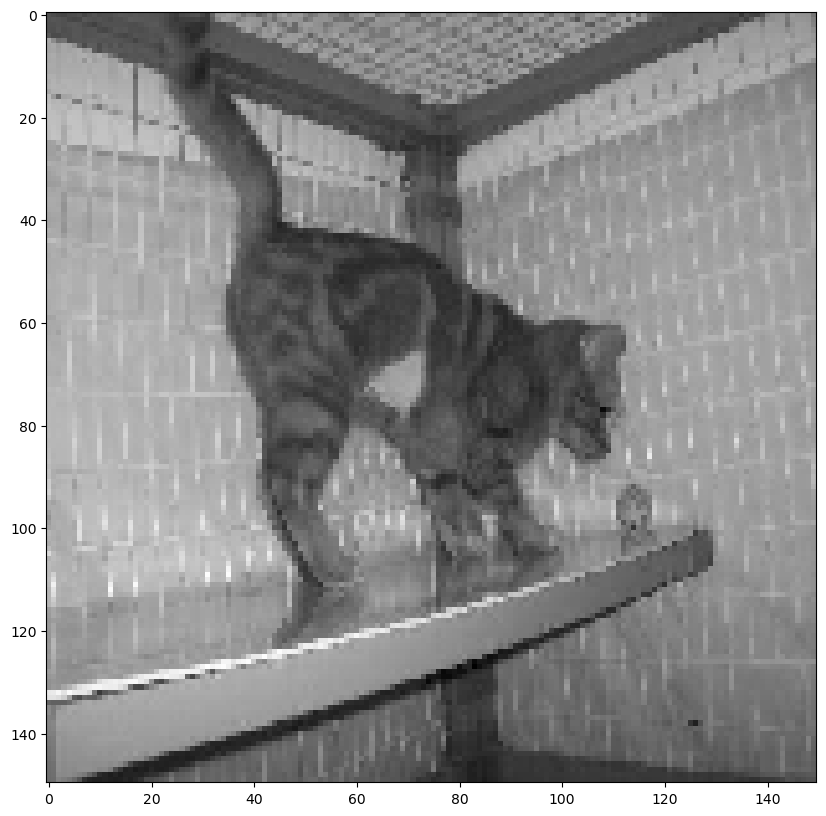

In [26]:
plt.figure(figsize=(10, 10))
plt.imshow(image_gray, cmap='gray')
plt.show()

## Different color channels of the image

In [27]:
blue, green, red = image[:, :, 0], image[:, :, 1], image[:, :, 2] 

In [28]:
im_bgr = cv2.vconcat([blue, green, red])

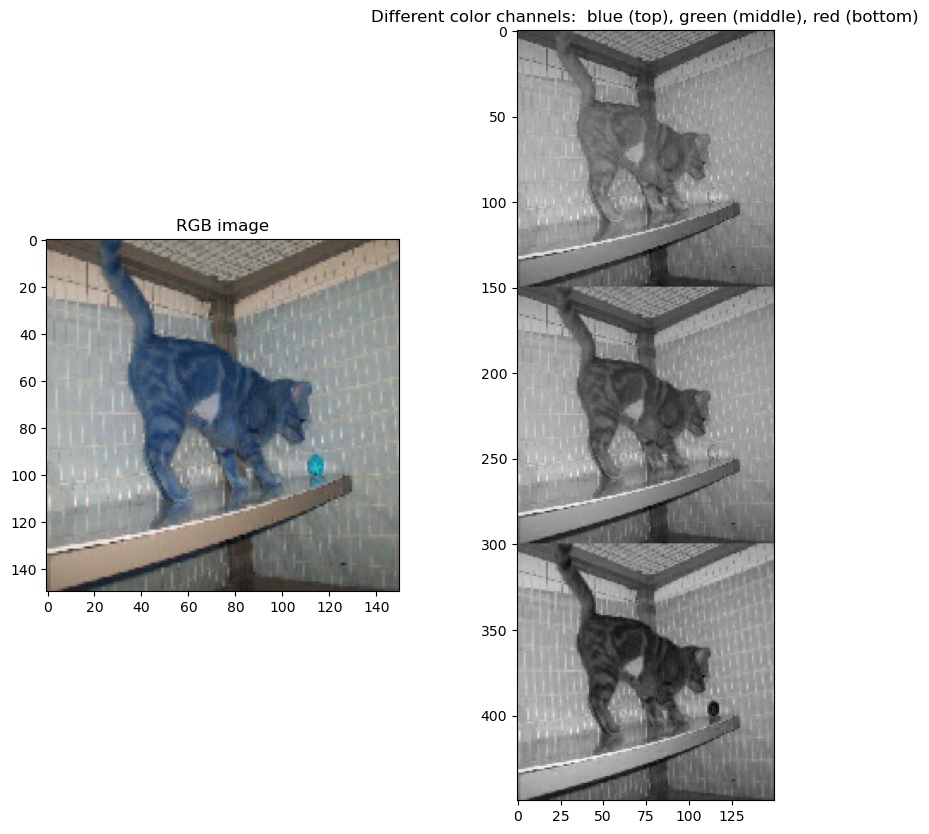

In [29]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("RGB image")
plt.subplot(122)
plt.imshow(im_bgr,cmap='gray')
plt.title("Different color channels:  blue (top), green (middle), red (bottom)")
plt.show()

## Image Cropping

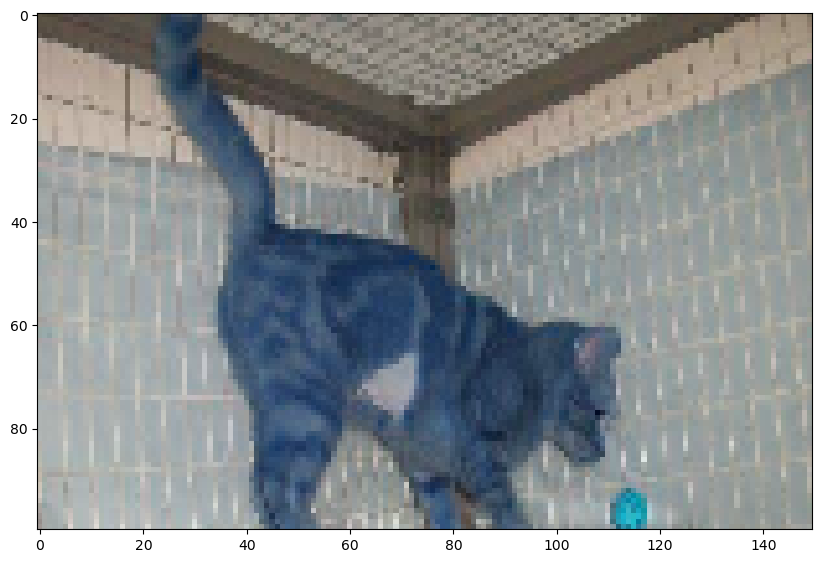

In [30]:
rows = 100
plt.figure(figsize=(10,10))
plt.imshow(new_image[0:rows,:,:])
plt.show()

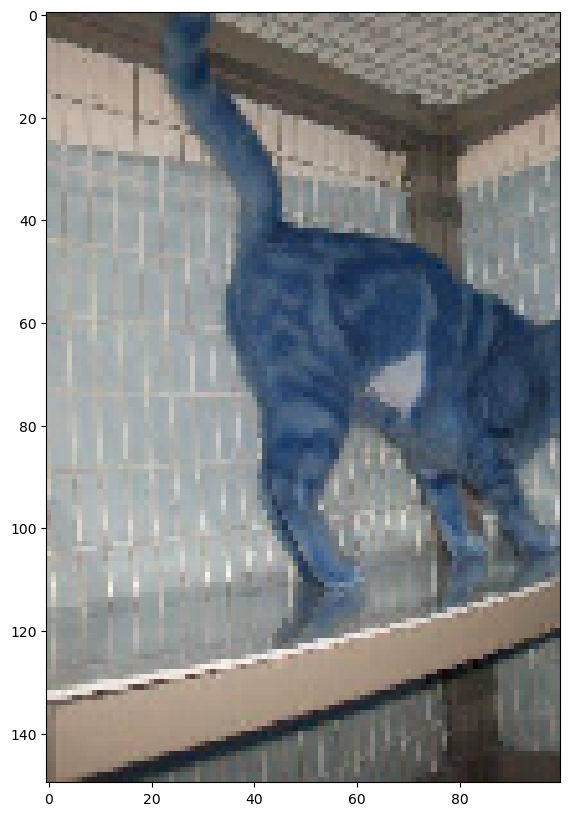

In [31]:
columns = 100
plt.figure(figsize=(10,10))
plt.imshow(new_image[:, 0:columns,:])
plt.show()

## Red

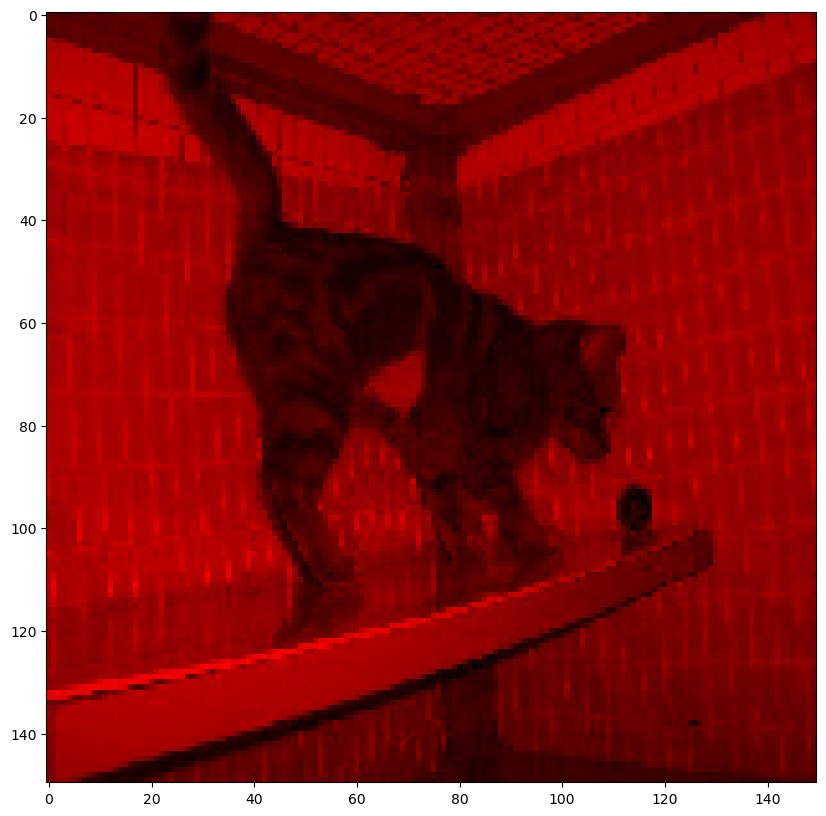

In [32]:
image_red = image.copy()
image_red[:, :, 0] = 0
image_red[:, :, 1] = 0
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image_red, cv2.COLOR_BGR2RGB))
plt.show()

## Blue

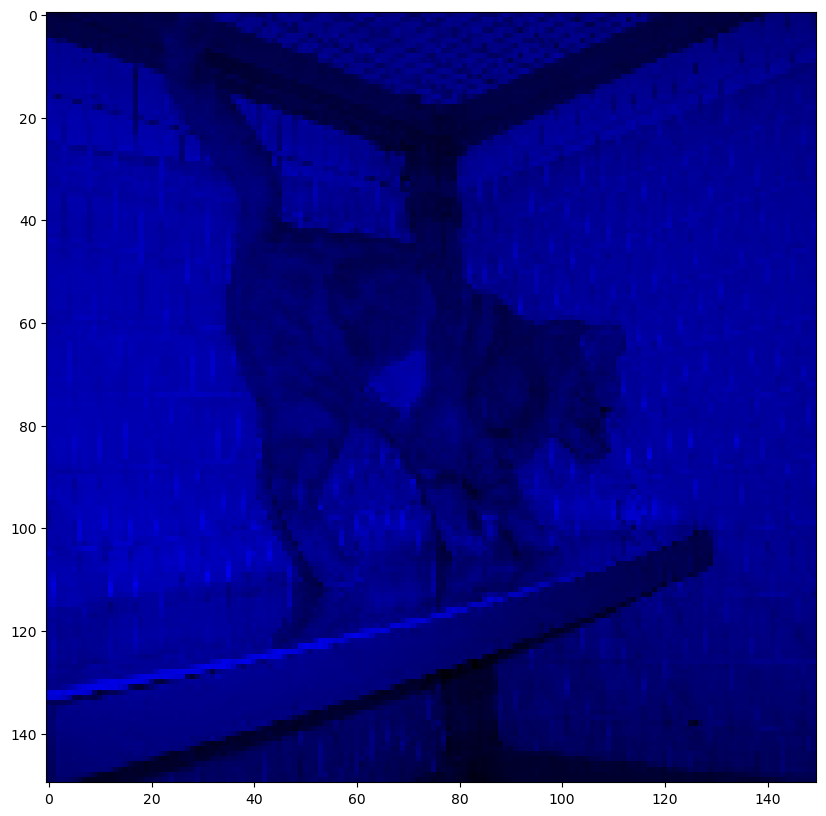

In [33]:
image_blue = image.copy()
image_blue[:, :, 1] = 0
image_blue[:, :, 2] = 0
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image_blue, cv2.COLOR_BGR2RGB))
plt.show()

## Green

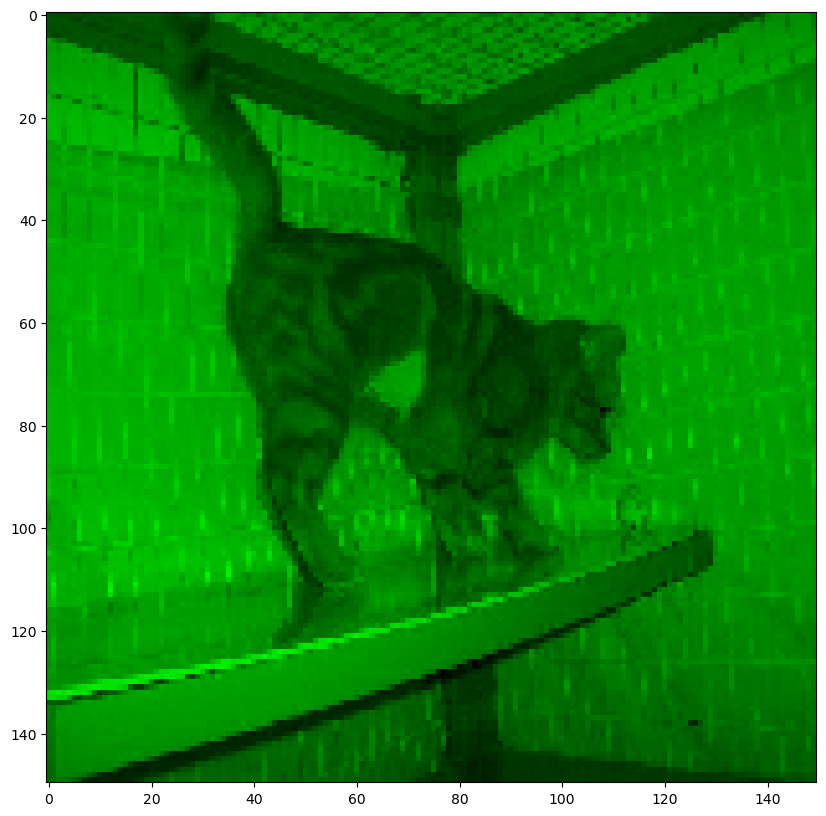

In [34]:
image_green = image.copy()
image_green[:, :, 0] = 0
image_green[:, :, 2] = 0
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image_green, cv2.COLOR_BGR2RGB))
plt.show()

## Removing only red channel

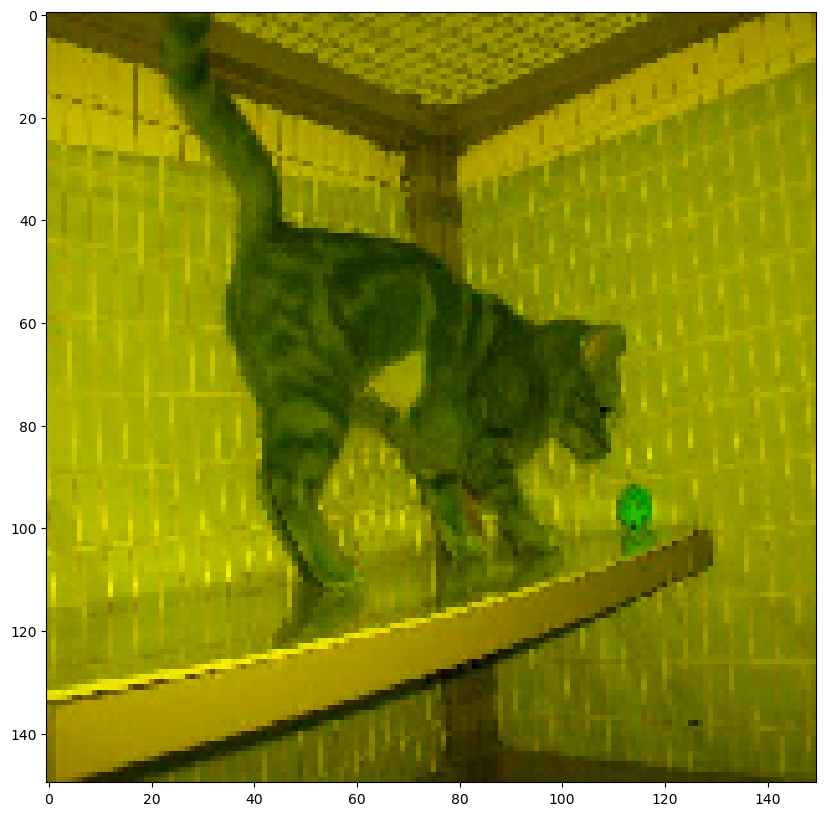

In [35]:
image_notred = image.copy()
image_notred = cv2.cvtColor(image_notred,cv2.COLOR_BGR2RGB)
image_notred[:,:,2] = 0
plt.figure(figsize = (10,10))
plt.imshow(image_notred)
plt.show()

## Model Buiilding with softmax activation function

In [36]:
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation = 'softmax')
])

In [37]:
model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [38]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [39]:
epochs = 100
history1 = model1.fit(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(batch_size))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(batch_size)))
)

Epoch 1/100
20/20 [==============================] - 18s 281ms/step - loss: 0.7153 - accuracy: 0.5045 - val_loss: 0.6875 - val_accuracy: 0.5110
Epoch 2/100
20/20 [==============================] - 5s 273ms/step - loss: 0.6884 - accuracy: 0.5515 - val_loss: 0.6898 - val_accuracy: 0.5290
Epoch 3/100
20/20 [==============================] - 6s 272ms/step - loss: 0.6774 - accuracy: 0.5620 - val_loss: 0.6471 - val_accuracy: 0.5860
Epoch 4/100
20/20 [==============================] - 5s 266ms/step - loss: 0.6349 - accuracy: 0.6330 - val_loss: 0.6220 - val_accuracy: 0.6730
Epoch 5/100
20/20 [==============================] - 5s 265ms/step - loss: 0.5931 - accuracy: 0.6845 - val_loss: 0.5801 - val_accuracy: 0.6900
Epoch 6/100
20/20 [==============================] - 5s 265ms/step - loss: 0.6002 - accuracy: 0.6740 - val_loss: 0.6767 - val_accuracy: 0.5870
Epoch 7/100
20/20 [==============================] - 6s 305ms/step - loss: 0.5726 - accuracy: 0.7125 - val_loss: 0.5901 - val_accuracy: 0.705

#### Overfitting

* Final Training accuracy >> Validation Accuracy 

## Helper function for accuracy plot

In [40]:
def accuracy_plot(history):
    epochs = 100
    
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs_range = range(epochs)
    
    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper left')
    plt.title('Training and Validation Loss')
    plt.show()

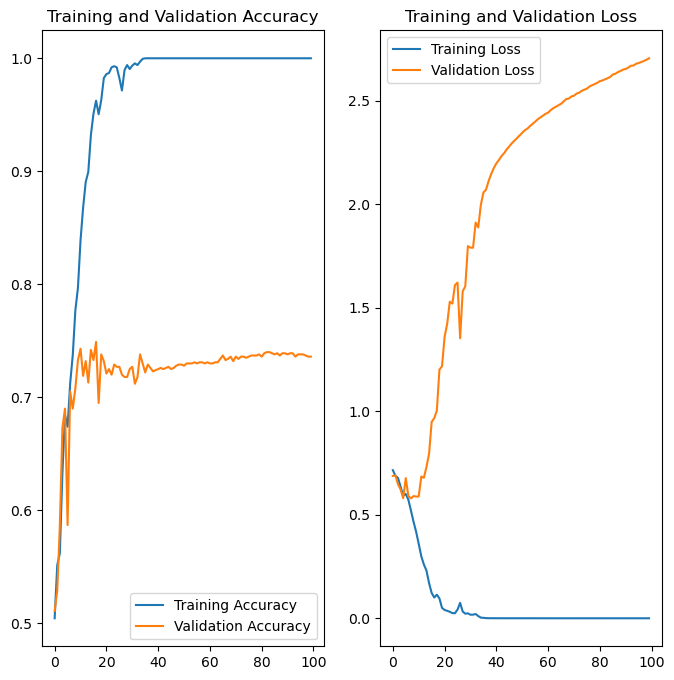

In [41]:
accuracy_plot(history1)

## Model Building with sigmoid activation function

In [42]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model2.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])


In [43]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

In [44]:
history2 = model2.fit(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(batch_size))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(batch_size)))
)

Epoch 1/100
20/20 [==============================] - 9s 314ms/step - loss: 0.7031 - accuracy: 0.5010 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 2/100
20/20 [==============================] - 5s 257ms/step - loss: 0.6933 - accuracy: 0.5070 - val_loss: 0.6902 - val_accuracy: 0.5680
Epoch 3/100
20/20 [==============================] - 5s 262ms/step - loss: 0.6754 - accuracy: 0.5835 - val_loss: 0.6866 - val_accuracy: 0.5400
Epoch 4/100
20/20 [==============================] - 6s 278ms/step - loss: 0.6869 - accuracy: 0.5555 - val_loss: 0.6820 - val_accuracy: 0.5690
Epoch 5/100
20/20 [==============================] - 5s 273ms/step - loss: 0.6561 - accuracy: 0.5925 - val_loss: 0.6591 - val_accuracy: 0.6470
Epoch 6/100
20/20 [==============================] - 5s 265ms/step - loss: 0.6138 - accuracy: 0.6665 - val_loss: 0.6128 - val_accuracy: 0.6730
Epoch 7/100
20/20 [==============================] - 5s 265ms/step - loss: 0.5648 - accuracy: 0.7120 - val_loss: 0.6317 - val_accuracy: 0.6610

#### Overfitting

* Final Training accuracy >> Validation Accuracy 

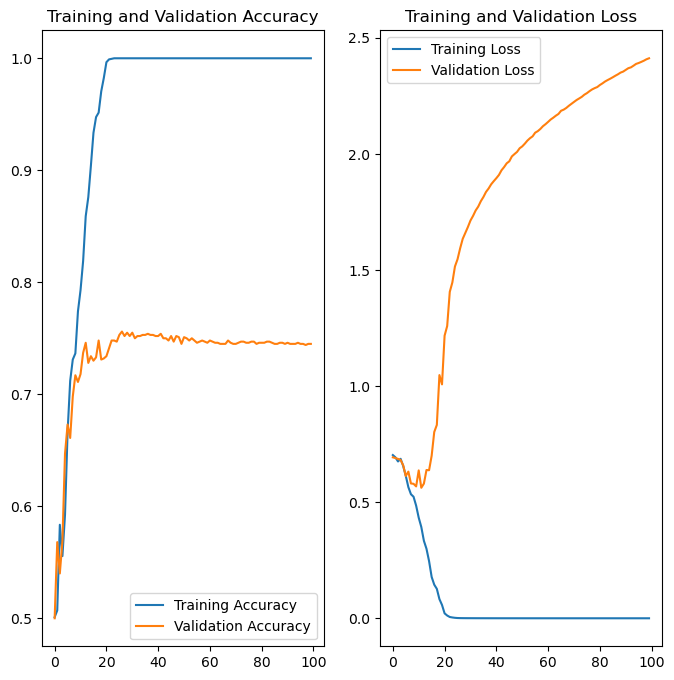

In [45]:
accuracy_plot(history2)

## Techniques to prevent Overfitting:

1. Early Stopping: In this method, we track the loss on the validation set during the training phase and use it to determine when to stop training such that the model is accurate but not overfitting.

2. Image Augmentation: Artificially boosting the number of images in our training set by applying random image transformations to the existing images in the training set.

3. Dropout: Removing a random selection of a fixed number of neurons in a neural network during training.


* In this case Image augmentation is applied.



## Image Augmentation: Horizontal Flip

In [46]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(img_shape,img_shape))

Found 2000 images belonging to 2 classes.


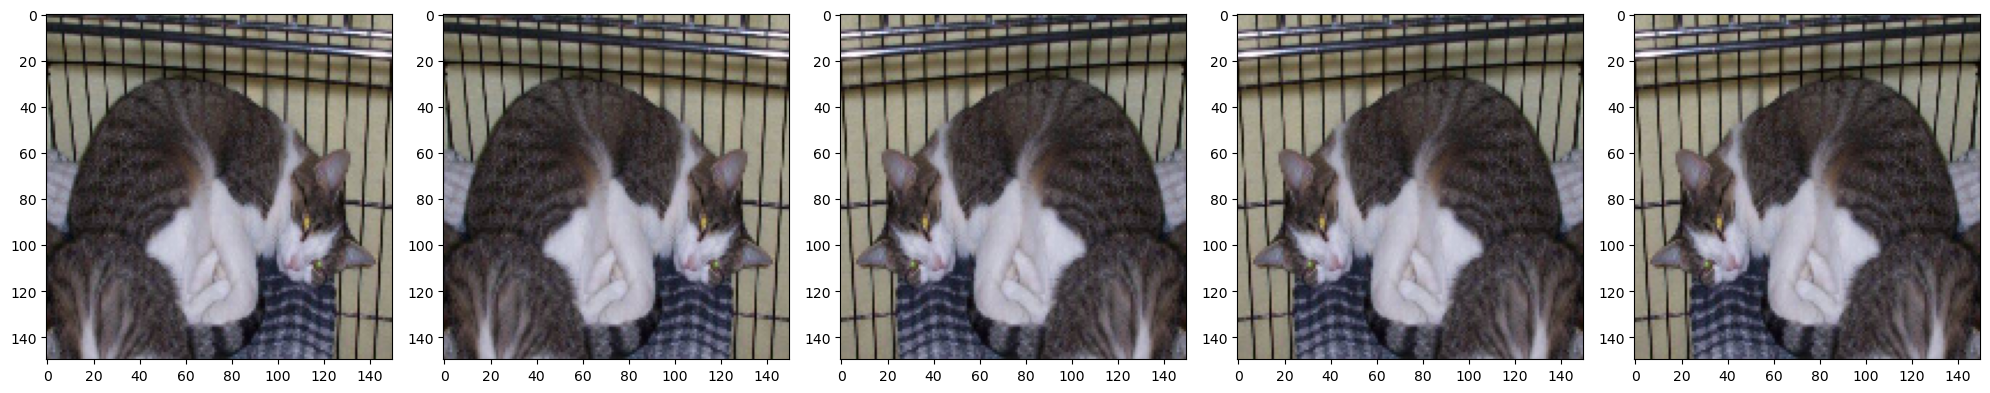

In [47]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

## Image Augmentation: Image Rotation

In [48]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(img_shape, img_shape))

Found 2000 images belonging to 2 classes.


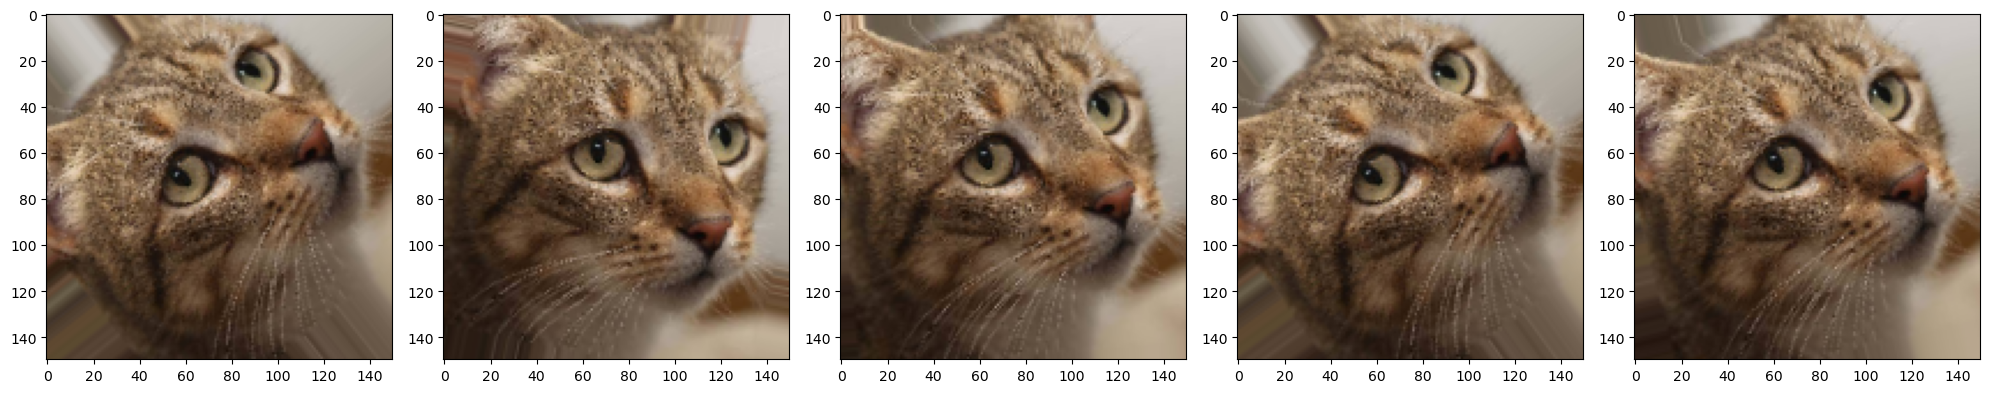

In [49]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

##  Image Augmentation: Zooming image

In [50]:
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(img_shape, img_shape))


Found 2000 images belonging to 2 classes.


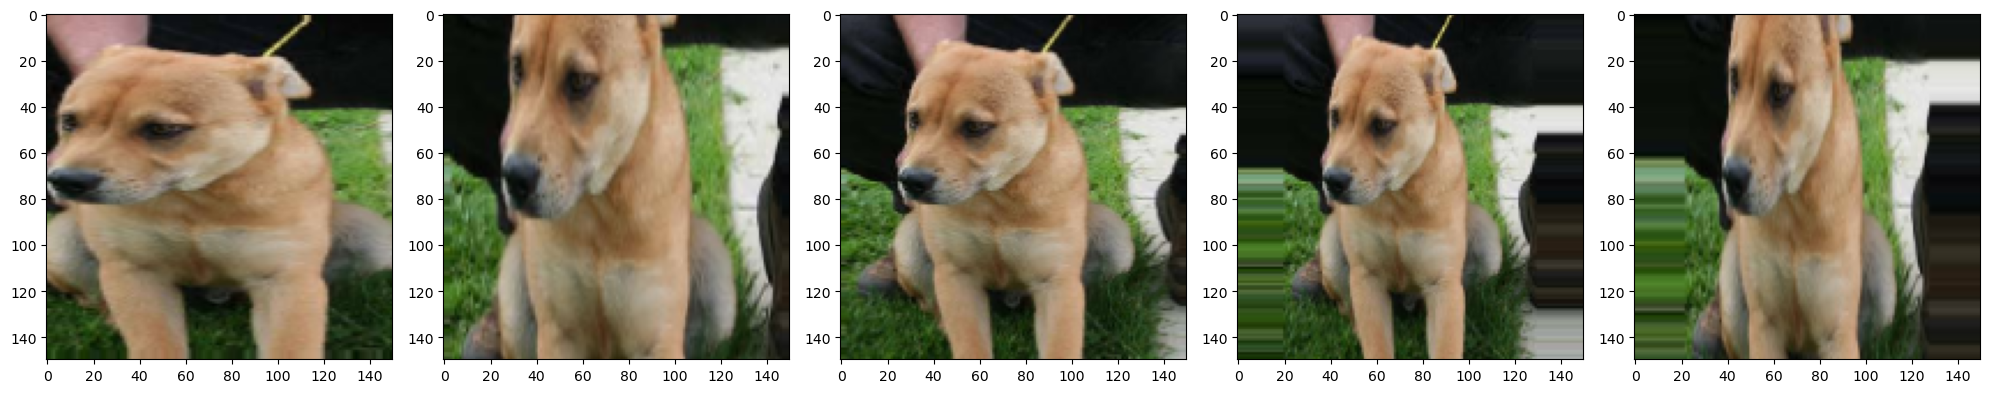

In [51]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

## Applying Image Augmentation methods together

In [52]:
image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(img_shape,img_shape),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


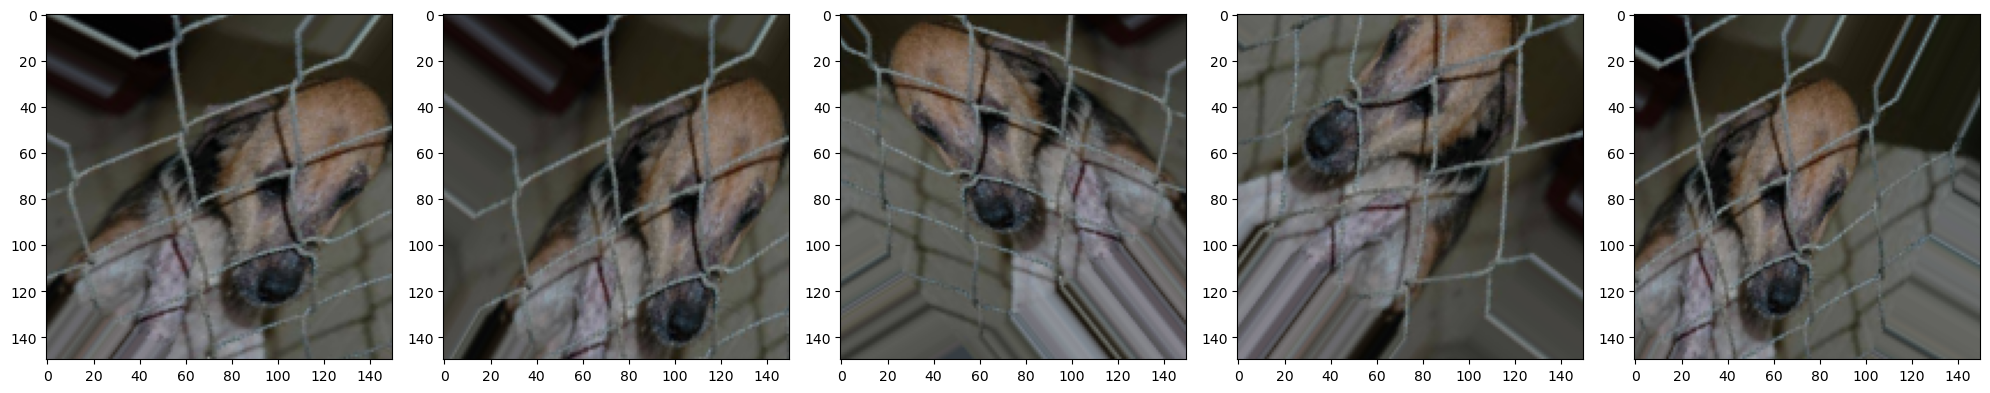

In [53]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [54]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(img_shape, img_shape),
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


* Sigmoid function was performing better on this dataset, so we will move forward with the sigmoid activation function

## Model Building with Sigmoid activation Function

In [55]:
model3 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [56]:
model3.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [57]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 17, 17, 128)     

In [58]:
epochs=100
history3 = model3.fit(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(batch_size))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(batch_size)))
)

Epoch 1/100


2023-07-15 09:05:07.274491: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_2/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


20/20 [==============================] - 18s 777ms/step - loss: 0.6940 - accuracy: 0.5255 - val_loss: 0.6886 - val_accuracy: 0.5260
Epoch 2/100
20/20 [==============================] - 15s 752ms/step - loss: 0.6790 - accuracy: 0.5660 - val_loss: 0.6943 - val_accuracy: 0.5300
Epoch 3/100
20/20 [==============================] - 16s 778ms/step - loss: 0.6754 - accuracy: 0.5670 - val_loss: 0.6600 - val_accuracy: 0.6300
Epoch 4/100
20/20 [==============================] - 16s 803ms/step - loss: 0.6673 - accuracy: 0.5880 - val_loss: 0.6430 - val_accuracy: 0.6180
Epoch 5/100
20/20 [==============================] - 15s 749ms/step - loss: 0.6485 - accuracy: 0.6275 - val_loss: 0.6263 - val_accuracy: 0.6450
Epoch 6/100
20/20 [==============================] - 16s 789ms/step - loss: 0.6343 - accuracy: 0.6355 - val_loss: 0.6184 - val_accuracy: 0.6480
Epoch 7/100
20/20 [==============================] - 15s 739ms/step - loss: 0.6258 - accuracy: 0.6385 - val_loss: 0.6194 - val_accuracy: 0.6530
Epoc

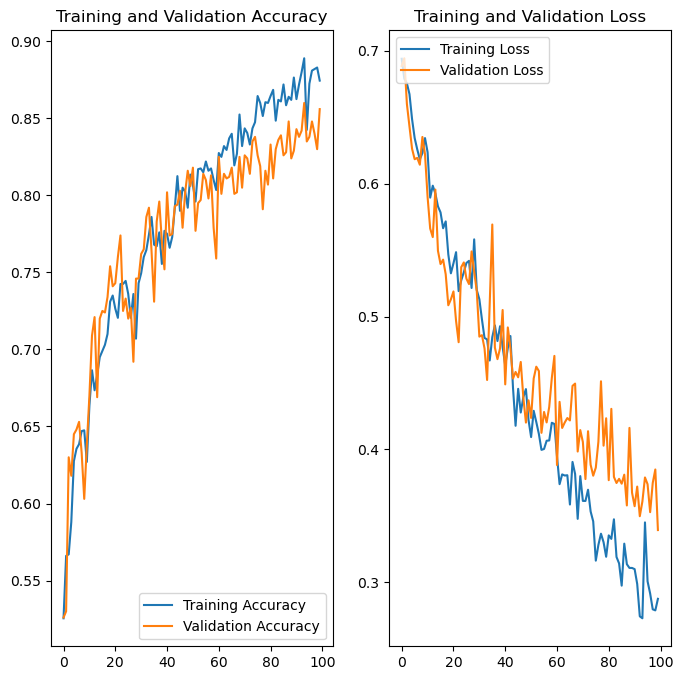

In [59]:
accuracy_plot(history3)

## Model Building with softmax activation function

In [60]:
model4 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation = 'softmax')
])

In [61]:
model4.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [62]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 17, 17, 128)     

In [63]:
epochs=100
history4 = model4.fit(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(batch_size))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(batch_size)))
)

Epoch 1/100


2023-07-15 09:35:15.780812: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_3/dropout_1/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


20/20 [==============================] - 17s 715ms/step - loss: 0.7026 - accuracy: 0.5110 - val_loss: 0.6901 - val_accuracy: 0.5010
Epoch 2/100
20/20 [==============================] - 15s 754ms/step - loss: 0.6909 - accuracy: 0.5335 - val_loss: 0.6888 - val_accuracy: 0.5020
Epoch 3/100
20/20 [==============================] - 15s 724ms/step - loss: 0.6846 - accuracy: 0.5560 - val_loss: 0.6849 - val_accuracy: 0.5170
Epoch 4/100
20/20 [==============================] - 16s 782ms/step - loss: 0.6780 - accuracy: 0.5640 - val_loss: 0.6733 - val_accuracy: 0.6120
Epoch 5/100
20/20 [==============================] - 14s 722ms/step - loss: 0.6705 - accuracy: 0.5650 - val_loss: 0.6421 - val_accuracy: 0.6520
Epoch 6/100
20/20 [==============================] - 16s 774ms/step - loss: 0.6453 - accuracy: 0.6110 - val_loss: 0.6046 - val_accuracy: 0.6780
Epoch 7/100
20/20 [==============================] - 15s 737ms/step - loss: 0.6315 - accuracy: 0.6510 - val_loss: 0.6252 - val_accuracy: 0.6510
Epoc

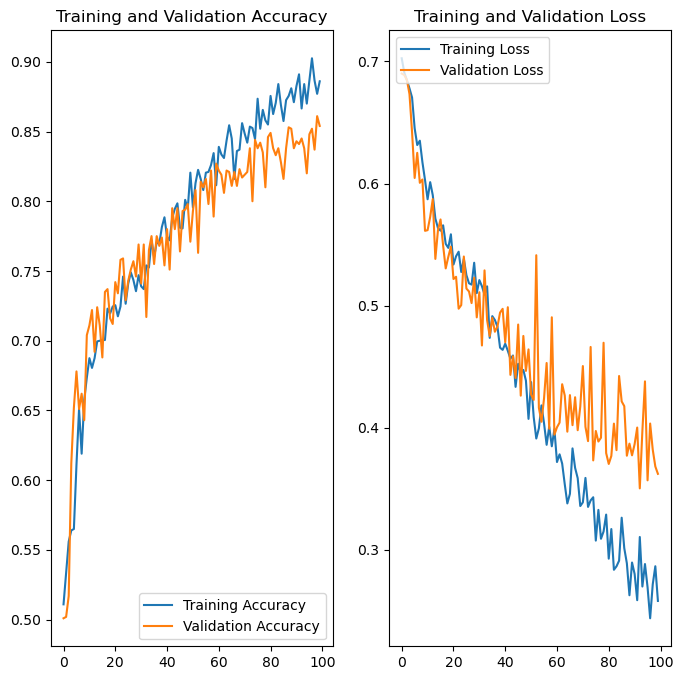

In [64]:
accuracy_plot(history4)

## Conclusion:

1. With Image augmentation, the problem of overfitting was eliminated very closely as compared to the previous model.
2. Sometimes, sigmoid activation function performs better than softmax activation function and vice versa. 